### voting, boosting

In [167]:
!pip install xgboost

In [168]:
!pip install lightgbm

In [169]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import xgboost as xgb
from lightgbm import LGBMRegressor
import numpy as np
import matplotlib.pyplot as plt

In [116]:
train = pd.read_excel('아버지아들키.xlsx', sheet_name='train')
test = pd.read_excel('아버지아들키.xlsx', sheet_name='test')

In [117]:
display(train),display(test)

,Father,Son
0,165.100,151.892
1,165.100,160.782
2,167.132,159.512
3,155.194,163.322
4,160.020,163.068
...,...,...
750,186.182,172.466
751,167.132,154.940
752,181.102,173.482
753,179.578,176.022


,Father,Son
0,160.782,160.528
1,166.116,162.814
2,165.608,164.592
3,169.672,166.370
4,176.530,166.370
...,...,...
318,183.388,169.418
319,160.528,149.352
320,171.958,151.892
321,170.180,179.832


(None, None)

In [118]:
X_train = train["Father"]
y_train = train["Son"]
X_test = test["Father"]
y_test = test["Son"]

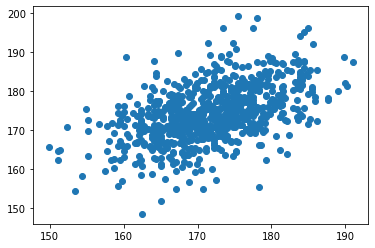

In [119]:
plt.scatter(X_train,y_train)

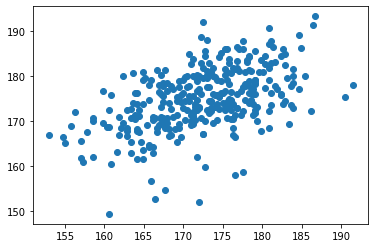

In [120]:
plt.scatter(X_test,y_test)

In [121]:
X_train = X_train.to_numpy().reshape(-1,1)
X_test = X_test.to_numpy().reshape(-1,1)

In [170]:
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors=90)
model3 = DecisionTreeRegressor()
model4 = RandomForestRegressor(n_estimators=500)
model5 = GradientBoostingRegressor(n_estimators=500)
model6 = xgb.XGBRegressor()
model7 = LGBMRegressor()

In [171]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)
model6.fit(X_train,y_train)
model7.fit(X_train,y_train)

LGBMRegressor()

In [172]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)
predict4 = model4.predict(X_test)
predict5 = model5.predict(X_test)
predict6 = model6.predict(X_test)
predict7 = model7.predict(X_test)

In [175]:
# r2_score 확인 : 높을수록좋음
print(r2_score(y_test,predict1))
print(r2_score(y_test,predict2))
print(r2_score(y_test,predict3))
print(r2_score(y_test,predict4))
print(r2_score(y_test,predict5))
print(r2_score(y_test,predict6))
print(r2_score(y_test,predict7))

0.2519977905846619
0.24758120770082503
0.07133438875422093
0.1192340917198782
0.09088520188892446
0.07841681998519068
0.18113480901854329


In [204]:
# 과대적합 확인
predict10 = model1.predict(X_train)
predict11 = model2.predict(X_train)
predict12 = model3.predict(X_train)
predict13 = model4.predict(X_train)
predict14 = model5.predict(X_train)
predict15 = model6.predict(X_train)
predict16 = model7.predict(X_train)

print(r2_score(y_train,predict10))
print(r2_score(y_train,predict11))
print(r2_score(y_train,predict12))
print(r2_score(y_train,predict13))
print(r2_score(y_train,predict14))
print(r2_score(y_train,predict15))
print(r2_score(y_train,predict16))

0.24967004992776776
0.24442748476429876
0.37981060494153207
0.3739744344814617
0.3790536675617837
0.3797250879130013
0.3223498779779298


In [153]:
avg_predict = (predict1 + predict2 + predict3)/3
print(r2_score(y_test, avg_predict))

0.23208918817372948


In [154]:
# 가중치 평균
avg_predict = ((25*predict1) + (24*predict2) + (7*predict3))/56
print(r2_score(y_test, avg_predict))

0.24998374238332133


#### 중심극한의 정리
    n개의 표본을 뽑아서 평균을 구하는 방식 -> 분산이 줄어듬
    단점 : 계산비용이 늘어남

In [183]:
model1.score(X_test,y_test)
model2.score(X_test,y_test)
model3.score(X_test,y_test)
model4.score(X_test,y_test)
model5.score(X_test,y_test)
model6.score(X_test,y_test)
model7.score(X_test,y_test)

[0.2519977905846619,
 0.24758120770082503,
 0.07133438875422093,
 0.1192340917198782,
 0.09088520188892446,
 0.07841681998519068,
 0.18113480901854329]

In [193]:
model_score = [r2_score(y_test,predict1),r2_score(y_test,predict2),r2_score(y_test,predict3),r2_score(y_test,predict4),r2_score(y_test,predict5),r2_score(y_test,predict6),r2_score(y_test,predict7)]
index = ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor','LGBMRegressor']
df = pd.DataFrame(model_score, index=index, columns=["score"])
df


,score
LinearRegression,0.251998
KNeighborsRegressor,0.247581
DecisionTreeRegressor,0.071334
RandomForestRegressor,0.119234
GradientBoostingRegressor,0.090885
XGBRegressor,0.078417
LGBMRegressor,0.181135


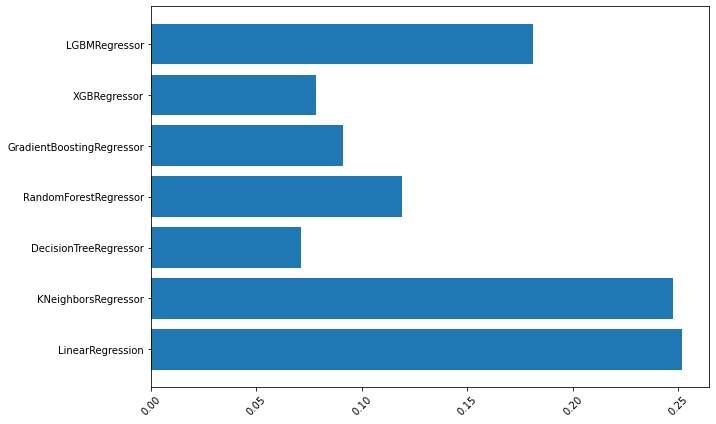

In [194]:
plt.figure(figsize=(10,7))
plt.barh(df.index, df["score"])
plt.xticks(rotation=45)
plt.show()

In [205]:
model_score = [r2_score(y_train,predict10),r2_score(y_train,predict11),r2_score(y_train,predict12),r2_score(y_train,predict13),r2_score(y_train,predict14),r2_score(y_train,predict15),r2_score(y_train,predict16)]
index = ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor','LGBMRegressor']
df1 = pd.DataFrame(model_score, index=index, columns=["score"])
df1

,score
LinearRegression,0.249670
KNeighborsRegressor,0.244427
DecisionTreeRegressor,0.379811
RandomForestRegressor,0.373974
GradientBoostingRegressor,0.379054
XGBRegressor,0.379725
LGBMRegressor,0.322350


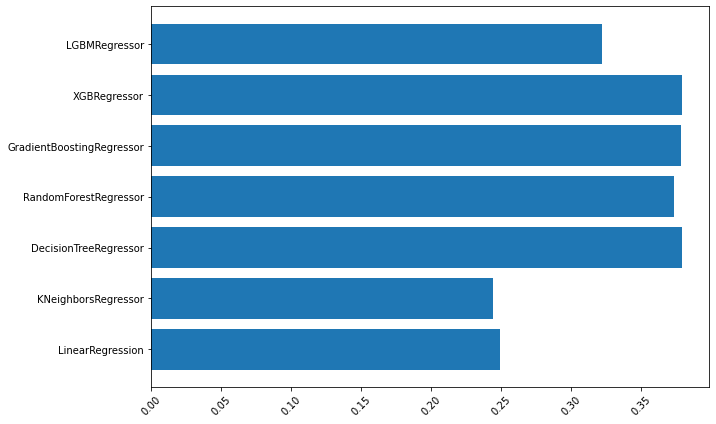

In [206]:
plt.figure(figsize=(10,7))
plt.barh(df1.index, df1["score"])
plt.xticks(rotation=45)
plt.show()

In [192]:
model_score = [model1.score(X_test,y_test),model2.score(X_test,y_test),model3.score(X_test,y_test),model4.score(X_test,y_test),model5.score(X_test,y_test),model6.score(X_test,y_test),model7.score(X_test,y_test)]
index = ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor','LGBMRegressor']
df = pd.DataFrame(model_score, index=index, columns=["score"])
df


,score
LinearRegression,0.251998
KNeighborsRegressor,0.247581
DecisionTreeRegressor,0.071334
RandomForestRegressor,0.119234
GradientBoostingRegressor,0.090885
XGBRegressor,0.078417
LGBMRegressor,0.181135


In [198]:
model_list = [model1,model2,model3,model4,model5,model6,model7]
index_list = ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor','LGBMRegressor']
model_score=[]
for i in model_list:
    model_score.append(i.score(X_test,y_test))
df = pd.DataFrame(model_score,index=index_list,columns=["score"])
df


,score
LinearRegression,0.251998
KNeighborsRegressor,0.247581
DecisionTreeRegressor,0.071334
RandomForestRegressor,0.119234
GradientBoostingRegressor,0.090885
XGBRegressor,0.078417
LGBMRegressor,0.181135


In [200]:
model_list = [model1,model2,model3,model4,model5,model6,model7]
index_list = ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor','LGBMRegressor']
model_score=[]
for i in model_list:
    model_score.append(r2_score(y_test,i.predict(X_test)))
df = pd.DataFrame(model_score,index=index_list,columns=["score"])
df


,score
LinearRegression,0.251998
KNeighborsRegressor,0.247581
DecisionTreeRegressor,0.071334
RandomForestRegressor,0.119234
GradientBoostingRegressor,0.090885
XGBRegressor,0.078417
LGBMRegressor,0.181135


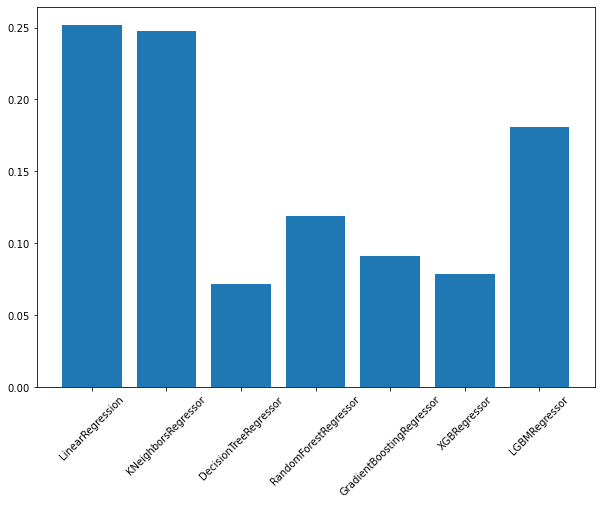

In [201]:
plt.figure(figsize=(10,7))
plt.bar(df.index, df["score"])
plt.xticks(rotation=45)
plt.show()

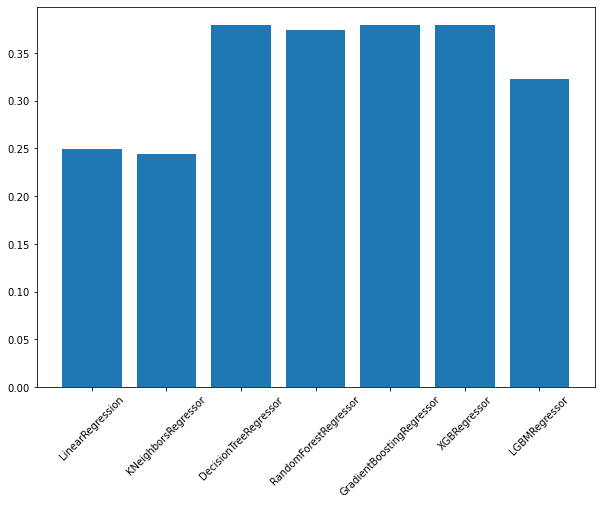

In [207]:
plt.figure(figsize=(10,7))
plt.bar(df1.index, df1["score"])
plt.xticks(rotation=45)
plt.show()